Testing convergence inside of n_analyze by comparing `x` trials of `base_n_analyze` steps with one trial of `x * base_n_analyze` steps

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# special parameters
base_n_analyze = 10000
x = 20

# other parameters
n_slope = 5000
n_burnin = 10000
N = 100
b_top = 0.5

# test only at T = 2.3 (near Tc) (all other T values are much more stable, and convergence is less of an issue)
t_min = 2.3
t_step = 1
t_max = 2.4

multiprocess = False # multiprocess does not seem to be working. Also it doesn't help much with runs of few T values.

In [45]:
# first, the ten trials:
n_analyze = base_n_analyze
n_steps = n_slope + n_burnin + n_analyze # ising.py takes this as an arg instead of n_slope
for i in range(x):
    Experiment_name = f"10k_{i}_r2"
    !python ising.py n_steps:$n_steps n_burnin:$n_burnin n_analyze:$n_analyze N:$N b_top:$b_top t_min:$t_min t_max:$t_max \
                 t_step:$t_step multiprocess:$multiprocess
    !mkdir datatests/$Experiment_name 
    !mv data datatests/$Experiment_name
    !mv snapshots datatests/$Experiment_name
    !mv series datatests/$Experiment_name
    !mkdir data
    !mkdir snapshots
    !mkdir series

inp["n_steps"]       set to int     25000
inp["n_burnin"]      set to int     10000
inp["n_analyze"]     set to int     10000
inp["N"]             set to int     100
inp["b_top"]         set to float   0.5
inp["t_min"]         set to float   2.3
inp["t_max"]         set to float   2.4
inp["t_step"]        set to int     1

2D Ising Model Simulation; single core

100x100 (T=2.30) steps:   25000/  25000, 100.0%  run time: 00:00:03  est.time-to-go:    done!
inp["n_steps"]       set to int     25000
inp["n_burnin"]      set to int     10000
inp["n_analyze"]     set to int     10000
inp["N"]             set to int     100
inp["b_top"]         set to float   0.5
inp["t_min"]         set to float   2.3
inp["t_max"]         set to float   2.4
inp["t_step"]        set to int     1

2D Ising Model Simulation; single core

100x100 (T=2.30) steps:   25000/  25000, 100.0%  run time: 00:00:03  est.time-to-go:    done!
inp["n_steps"]       set to int     25000
inp["n_burnin"]      set to int     1000

In [46]:
# then, the long trial
Experiment_name = "200k_r2"
n_analyze = base_n_analyze * x
n_steps = n_slope + n_burnin + n_analyze # ising.py takes this as an arg instead of n_slope
!python ising.py n_steps:$n_steps n_burnin:$n_burnin n_analyze:$n_analyze N:$N b_top:$b_top t_min:$t_min t_max:$t_max \
             t_step:$t_step multiprocess:$multiprocess
!mkdir datatests/$Experiment_name 
!mv data datatests/$Experiment_name
!mv snapshots datatests/$Experiment_name
!mv series datatests/$Experiment_name
!mkdir data
!mkdir snapshots
!mkdir series

inp["n_steps"]       set to int     215000
inp["n_burnin"]      set to int     10000
inp["n_analyze"]     set to int     200000
inp["N"]             set to int     100
inp["b_top"]         set to float   0.5
inp["t_min"]         set to float   2.3
inp["t_max"]         set to float   2.4
inp["t_step"]        set to int     1

2D Ising Model Simulation; single core

100x100 (T=2.30) steps:  215000/ 215000, 100.0%  run time: 00:00:32  est.time-to-go:    done!


In [52]:
# now, getting data. I want two series of length ~200k

many_trial_E = []
many_trial_M = []

for i in range(x):
    experiment_name = f"10k_{i}_r2"
    E = np.load(f"datatests/{experiment_name}/series/E_series.npy")[0] # only one trial, so we can drop the first axis
    M = np.load(f"datatests/{experiment_name}/series/M_series.npy")[0]
    many_trial_E.extend(E[n_burnin+n_slope:])
    many_trial_M.extend(M[n_burnin+n_slope:])

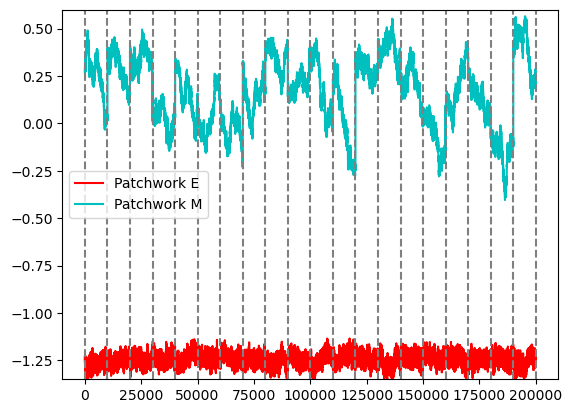

In [53]:
plt.plot(many_trial_E, label='Patchwork E', c='r')
plt.plot(many_trial_M, label='Patchwork M', c='c')
for i in range(x+1):
    plt.axvline(x=base_n_analyze*i, c='grey', ls='--')
plt.legend()
plt.ylim(-1.35, .6)
plt.show()

(-1.35, 0.6)

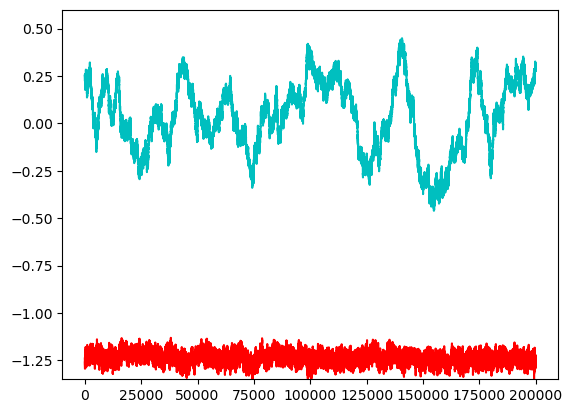

In [106]:
experiment_name = "200k_r2"
long_E = np.load(f"datatests/{experiment_name}/series/E_series.npy")[0][n_burnin+n_slope:]
long_M = np.load(f"datatests/{experiment_name}/series/M_series.npy")[0][n_burnin+n_slope:]
plt.plot(long_E, label='Long E', c='r')
plt.plot(long_M, label='Long M', c='c')
# for i in range(x+1):
#     plt.axvline(x=base_n_analyze*i, c='grey', ls='--')
plt.ylim(-1.35, .6)

In [55]:
print("Format: avg, std")
print("Long E:      ", np.average(long_E), ", ", np.std(long_E), sep='')
print("Patchwork E: ", np.average(many_trial_E), ", ", np.std(many_trial_E), sep='')
print("Long M:      ", np.average(long_M), ", ", np.std(long_M), sep='')
print("Patchwork M: ", np.average(many_trial_M), ", ", np.std(many_trial_M), sep='')

Format: avg, std
Long E:      -1.2377376479482651, 0.028511778628365618
Patchwork E: -1.2453033318269253, 0.02980396279882471
Long M:      0.035196966996896444, 0.18208426063672115
Patchwork M: 0.1672626159964435, 0.1815301584110209


In [83]:
# susceptibility is the main question here. chi/beta = <M^2> - <M>^2
# what would it be for the short trials?
chi_short = np.ndarray((x))
for i in range(x):
    temp_m = many_trial_M[base_n_analyze*i:base_n_analyze*(1+i)]
    chi_short[i] = np.average(np.square(temp_m)) - np.average(temp_m)**2

avg_chi_short = np.average(chi_short)
std_chi_short = np.std(chi_short)

chi_long = np.average(np.square(long_M)) - (np.average(long_M)**2)

# new in round 2: pretend long m is like patchwork m, and check the metrics in the same way
chi_long_split = np.ndarray((x))
for i in range(x):
    chi_long_split[i] = np.average(np.square(long_M[base_n_analyze*i:base_n_analyze*(1+i)])) - (np.average(long_M[base_n_analyze*i:base_n_analyze*(1+i)])**2)
avg_chi_long = np.average(chi_long_split)
std_chi_long = np.std(chi_long_split)

In [84]:
print(f"Short chi: {avg_chi_short} +/- {std_chi_short}")
print(f"Split Long chi: {avg_chi_long} +/- {std_chi_long}")
print(f"Long chi: {chi_long}")

Short chi: 0.009754059834105468 +/- 0.007434105305041604
Split Long chi: 0.011646824723965148 +/- 0.012601488144194822
Long chi: 0.03315467797162141


In [109]:
n_split = [1, 2, 5, 10, 20, 40]
for n in n_split:
    split_m = np.split(long_M, n)
    chi_split = [np.average(np.square(x)) - (np.average(x)**2) for x in split_m]
    avg_chi_split = np.average(chi_split)
    std_chi_split = np.std(chi_split)
    print(f"Split chi, n = {n} : {avg_chi_split} +/- {std_chi_split}")

Split chi, n = 1 : 0.03315467797162141 +/- 0.0
Split chi, n = 2 : 0.03315003778598406 +/- 0.014383544880268483
Split chi, n = 5 : 0.026440293226045 +/- 0.014055192547078712
Split chi, n = 10 : 0.021904129254964228 +/- 0.017672104732275776
Split chi, n = 20 : 0.011646824723965148 +/- 0.012601488144194822
Split chi, n = 40 : 0.0064386381773640835 +/- 0.004907525186393466


In [98]:
# this seems bad

In [99]:
# test E also
n_split = [1, 2, 5, 10, 20, 40]
for n in n_split:
    split_E = np.split(long_E, n)
    Cv_split = [np.average(np.square(x)) - (np.average(x)**2) for x in split_E]
    avg_Cv_split = np.average(Cv_split)
    std_Cv_split = np.std(Cv_split)
    print(f"Split Cv, n = {n} : {avg_Cv_split} +/- {std_Cv_split}")

Split Cv, n = 1 : 0.0008129215205530116 +/- 0.0
Split Cv, n = 2 : 0.0007828888849532589 +/- 0.00011984608271942143
Split Cv, n = 5 : 0.0007629770175225037 +/- 0.00011098512574350627
Split Cv, n = 10 : 0.0007368987034767516 +/- 0.00013481670448823042
Split Cv, n = 20 : 0.0006999909500938206 +/- 0.00013326046973029967
Split Cv, n = 40 : 0.0006514524687939339 +/- 0.00012978700321751197


In [108]:
# aaand finally, test with shuffled M (is this statistics or correlations)
n_split = [1, 2, 5, 10, 20, 40]
long_M_shuffle = np.copy(long_M)
np.random.shuffle(long_M_shuffle)
for n in n_split:
    split_m = np.split(long_M_shuffle, n)
    chi_split = [np.average(np.square(x)) - (np.average(x)**2) for x in split_m]
    avg_chi_split = np.average(chi_split)
    std_chi_split = np.std(chi_split)
    print(f"Split chi, n = {n} : {avg_chi_split} +/- {std_chi_split}")

Split chi, n = 1 : 0.0331546779716214 +/- 0.0
Split chi, n = 2 : 0.033154623101828734 +/- 5.286642708844658e-06
Split chi, n = 5 : 0.033154497235687155 +/- 9.108126728694077e-05
Split chi, n = 10 : 0.033153652680517884 +/- 0.0001806922912828273
Split chi, n = 20 : 0.03315121777547435 +/- 0.00032925245316196166
Split chi, n = 40 : 0.0331477460624866 +/- 0.0005219700113300422


__IMPORTANT__

What is going on here? Why does looking at a longer timescale appear to change susceptibility?

It seems to have to do with M being correlated on shorter timescales. Does this effect saturate at some n_steps?

In [75]:
rand = (np.random.rand(200000) * 2 - 1)
print(np.average(np.square(rand)) - np.average(rand) ** 2, "\n")

split_rand = np.split(rand, 20)
print(np.average([np.average(np.square(x))- np.average(x)**2 for x in split_rand]))

0.33299711536643867 

0.33297565394195044


In [ ]:
# does not appear to be inherent to standard deviation
# maybe my code is brokers?

Results (first round) (experiment names `10k_{i}` and `200k`):
```
Format: avg, std
Long E:      -1.2371593718212843, 0.028316111653590305
Patchwork E: -1.243015973856449, 0.028222355665724175
Long M:      -0.1038054460541888, 0.13108150417178455
Patchwork M: 0.16242349602135808, 0.14911705499901665
Short xi: 0.009927010072947752 +/- 0.006381365221780215
Long xi: 0.01718236073593757
```
Long E/M vs step:
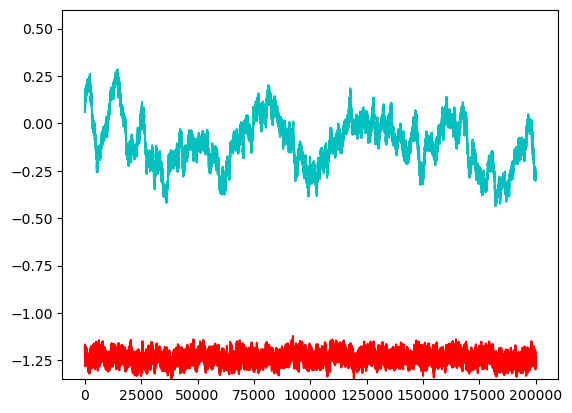

Patchwork E/M vs step:
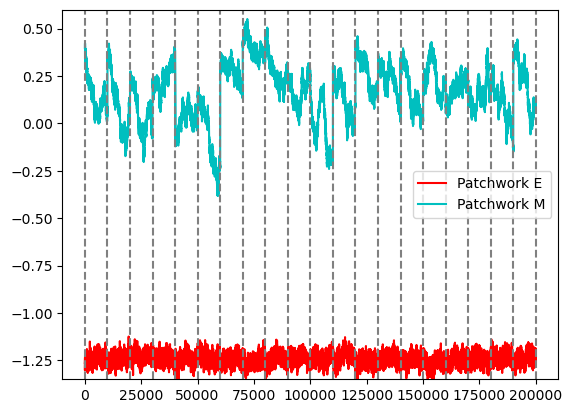